In [1]:
#import the libraries 

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# import the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check the missing values

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# drop Cabin column as there are so many missing values and will not help in model performance
# we will drop PassengerId, Name and Ticket also as these columns don't help in the model performance

df_train.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,inplace=True)

In [6]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
# define a function to fill the missing values in age column based on Pclass

def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [8]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [9]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
df_train.dropna(inplace=True)

In [11]:
# create a new featur family by using sibsp and parch columns

df_train['family']=df_train['SibSp'] + df_train['Parch'] + 1


In [12]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [13]:
df_train.drop(columns=['SibSp','Parch'],inplace=True)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [15]:
df_train['family'].value_counts()

1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [16]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [17]:
df_train['family_size'] = df_train['family'].apply(family_size)

In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,family_size
0,0,3,male,22.0,7.2500,S,2,Small
1,1,1,female,38.0,71.2833,C,2,Small
2,1,3,female,26.0,7.9250,S,1,Alone
3,1,1,female,35.0,53.1000,S,2,Small
4,0,3,male,35.0,8.0500,S,1,Alone


In [19]:
df_train_dummied = pd.get_dummies(df_train,columns=['Sex','Embarked','family_size'],drop_first= True)

In [20]:
df_train_dummied.head()

,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,3,22.0,7.2500,2,1,0,1,0,1
1,1,1,38.0,71.2833,2,0,0,0,0,1
2,1,3,26.0,7.9250,1,0,0,1,0,0
3,1,1,35.0,53.1000,2,0,0,1,0,1
4,0,3,35.0,8.0500,1,1,0,1,0,0


In [21]:
X = df_train_dummied.drop('Survived', axis =1)
y = df_train_dummied['Survived']

In [22]:
X.shape, y.shape

((889, 9), (889,))

In [42]:
# split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [43]:
# feature scalling

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [44]:
X_train_transform = std.fit_transform(X_train)
X_test_transform = std.transform(X_test)

In [45]:
X_train_transform.shape

(711, 9)

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3,random_state=1)

In [47]:
dt.fit(X_train_transform,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [48]:
y_pred_dt = dt.predict(X_test_transform)

In [49]:
accuracy_score(y_test,y_pred_dt)

0.8595505617977528

In [50]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       105
           1       0.88      0.77      0.82        73

    accuracy                           0.86       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



In [51]:
from sklearn import tree

[Text(0.5, 0.875, 'X[4] <= -0.327\ngini = 0.469\nsamples = 711\nvalue = [444, 267]'),
 Text(0.25, 0.625, 'X[0] <= 0.208\ngini = 0.405\nsamples = 245\nvalue = [69, 176]'),
 Text(0.125, 0.375, 'X[1] <= -1.993\ngini = 0.115\nsamples = 131\nvalue = [8, 123]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.103\nsamples = 129\nvalue = [7, 122]'),
 Text(0.375, 0.375, 'X[3] <= 1.621\ngini = 0.498\nsamples = 114\nvalue = [61, 53]'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 91\nvalue = [41, 50]'),
 Text(0.4375, 0.125, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.75, 0.625, 'X[1] <= -1.209\ngini = 0.314\nsamples = 466\nvalue = [375, 91]'),
 Text(0.625, 0.375, 'X[8] <= 0.337\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.5625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.875, 0.375, 'X[2] <= -0.095\ngini = 0.272\nsamples = 438\nvalue = [367, 

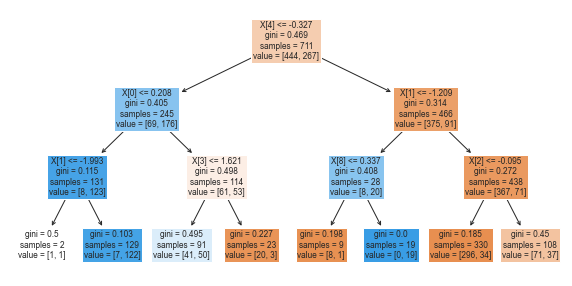

In [52]:
plt.figure(figsize=(10,5))
tree.plot_tree(dt,filled=True)

# let's check by using ccp_alpha whether the performance of model is getting incresed

In [68]:
path = dt.cost_complexity_pruning_path(X_train_transform,y_train)

In [69]:
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [70]:
ccp_alphas

array([0.00000000e+00, 5.02310629e-05, 7.03234880e-05, 1.40646976e-04,
       2.34411627e-04, 2.81293952e-04, 3.75058603e-04, 4.68823254e-04,
       4.68823254e-04, 6.25097672e-04, 6.81924733e-04, 6.91110141e-04,
       7.03234880e-04, 8.20440694e-04, 8.52405916e-04, 8.60929975e-04,
       8.65519853e-04, 8.95973329e-04, 9.24975609e-04, 9.37646507e-04,
       9.37646507e-04, 9.37646507e-04, 9.84528833e-04, 1.00797000e-03,
       1.02288710e-03, 1.03141116e-03, 1.04993459e-03, 1.05485232e-03,
       1.05485232e-03, 1.12517581e-03, 1.13298953e-03, 1.13654122e-03,
       1.20554551e-03, 1.21515199e-03, 1.25019534e-03, 1.26582278e-03,
       1.27860887e-03, 1.31270511e-03, 1.36534491e-03, 1.39307481e-03,
       1.39797951e-03, 1.40399358e-03, 1.50023441e-03, 1.55877851e-03,
       1.64192943e-03, 1.68776371e-03, 1.78704393e-03, 1.81874316e-03,
       1.88115331e-03, 1.89234113e-03, 2.02722556e-03, 2.22366761e-03,
       2.22366761e-03, 2.27237919e-03, 2.31661798e-03, 2.34411627e-03,
      

In [71]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_transform, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12359273289032013


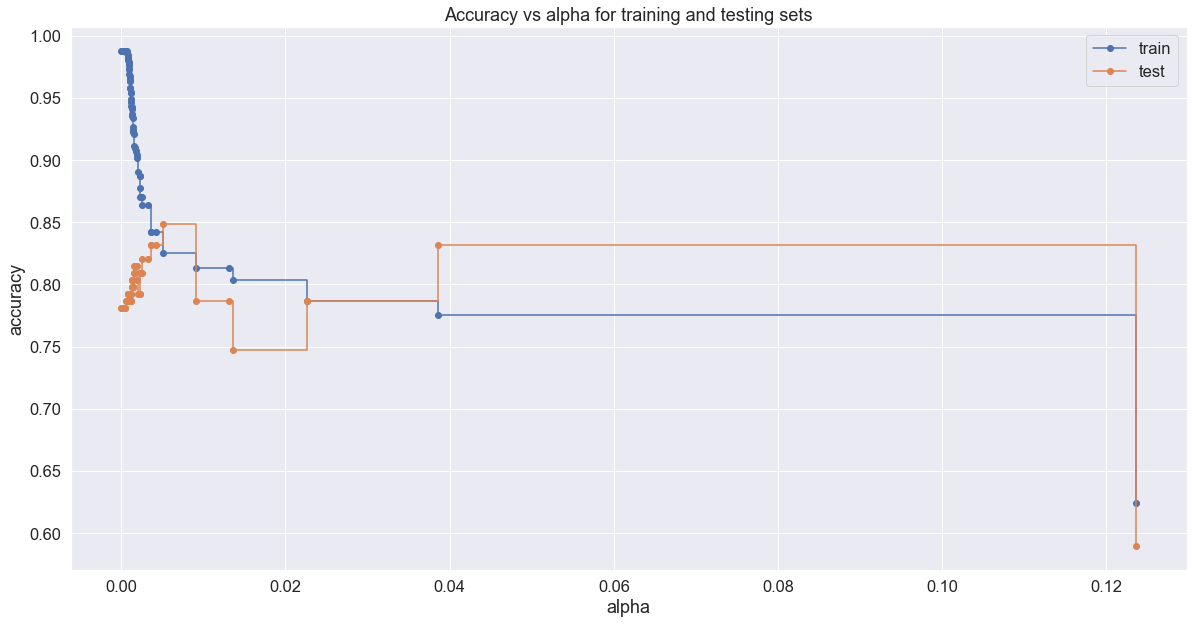

In [92]:
train_scores = [clf.score(X_train_transform, y_train) for clf in clfs]
test_scores = [clf.score(X_test_transform, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.007)
clf.fit(X_train_transform,y_train)

DecisionTreeClassifier(ccp_alpha=0.007, random_state=0)

In [54]:
pred=clf.predict(X_test_transform)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.848314606741573

We could see using ccp_alpha model performace is not increased.

[Text(0.4230769230769231, 0.875, 'X[4] <= -0.327\ngini = 0.469\nsamples = 711\nvalue = [444, 267]'),
 Text(0.15384615384615385, 0.625, 'X[0] <= 0.208\ngini = 0.405\nsamples = 245\nvalue = [69, 176]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.115\nsamples = 131\nvalue = [8, 123]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= -0.178\ngini = 0.498\nsamples = 114\nvalue = [61, 53]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.495\nsamples = 91\nvalue = [41, 50]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.6923076923076923, 0.625, 'X[1] <= -1.209\ngini = 0.314\nsamples = 466\nvalue = [375, 91]'),
 Text(0.5384615384615384, 0.375, 'X[7] <= 1.794\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= -0.095\ngini = 0.272\nsamples = 438\nvalue = [367, 71]

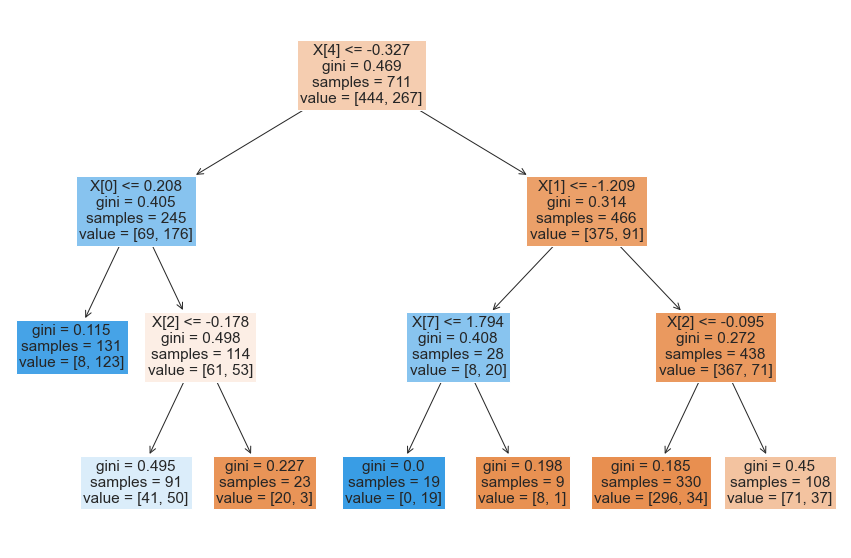

In [55]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)


Now we will apply the same prepocessing steps on Test data

In [84]:
passengerid = df_test['PassengerId']

In [86]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [88]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [90]:
df_test.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,inplace=True)

In [91]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [96]:
df_test.groupby(['Pclass'])['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [97]:
def age_approx1(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

In [98]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(age_approx1, axis=1)

In [99]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [100]:
df_test['family']=df_test['SibSp'] + df_test['Parch'] + 1

In [101]:
df_test.drop(columns=['SibSp','Parch'],inplace=True)

In [102]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,family
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,2
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,3


In [103]:
df_test['family_size'] = df_test['family'].apply(family_size)

In [104]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,family,family_size
0,3,male,34.5,7.8292,Q,1,Alone
1,3,female,47.0,7.0000,S,2,Small
2,2,male,62.0,9.6875,Q,1,Alone
3,3,male,27.0,8.6625,S,1,Alone
4,3,female,22.0,12.2875,S,3,Small


In [105]:
df_test_dummied = pd.get_dummies(df_test,columns=['Sex','Embarked','family_size'],drop_first= True)

In [106]:
df_test_dummied.head()

,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,3,34.5,7.8292,1,1,1,0,0,0
1,3,47.0,7.0000,2,0,0,1,0,1
2,2,62.0,9.6875,1,1,1,0,0,0
3,3,27.0,8.6625,1,1,0,1,0,0
4,3,22.0,12.2875,3,0,0,1,0,1


In [107]:
df_test_dummied.shape

(418, 9)

In [110]:
df_test_dummied_trans = std.transform(df_test_dummied)

In [112]:
y_pred_test_dt = dt.predict(df_test_dummied_trans)

In [113]:
y_pred_test_dt

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [116]:
final = pd.DataFrame()

In [117]:
final["PassengerId"] = passengerid

In [119]:
final['Survived'] = y_pred_test_dt

In [121]:
final.to_csv('Submission4.csv', index = False)